# Select features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
X = pd.read_csv('data/preprocessed_train.csv')
train = pd.read_csv('data/Train.csv')
y = train['bank_account']

X.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,0.0,1.0,0.10,0.095238,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.20,0.642857,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.20,0.119048,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.20,0.214286,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.35,0.119048,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Feature selection

### Univariate Selection

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

   Specs        Score
26    26  1398.459048
21    21  1309.442224
25    25  1287.543695
22    22  1224.908523
33    33   605.482163
17    17   386.875887
19    19   323.840989
20    20   295.349066
2      2   266.843216
5      5   190.722499


### Feature Importance

[1.05760727e-02 3.74495083e-02 2.83546148e-02 1.51631017e-01
 3.51043847e-01 2.33748542e-02 6.46679755e-03 1.67228763e-02
 2.13604723e-03 3.94363423e-03 3.84675759e-03 5.79380632e-03
 7.03031964e-03 1.77035601e-04 1.28480926e-02 1.06547351e-02
 5.78128207e-03 1.71716613e-02 9.63246421e-04 2.42933055e-02
 1.88041007e-02 4.28441332e-02 3.22379754e-02 1.23023694e-03
 8.92866561e-03 3.65443945e-02 4.50739490e-02 5.04969028e-03
 1.24935623e-02 1.67252352e-03 7.94029277e-03 9.56560149e-03
 1.56093011e-02 1.78868140e-02 6.93903571e-03 1.09375875e-02
 5.98262389e-03]


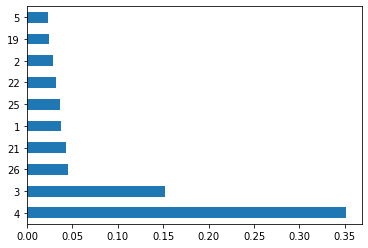

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Correlation Matrix with Heatmap

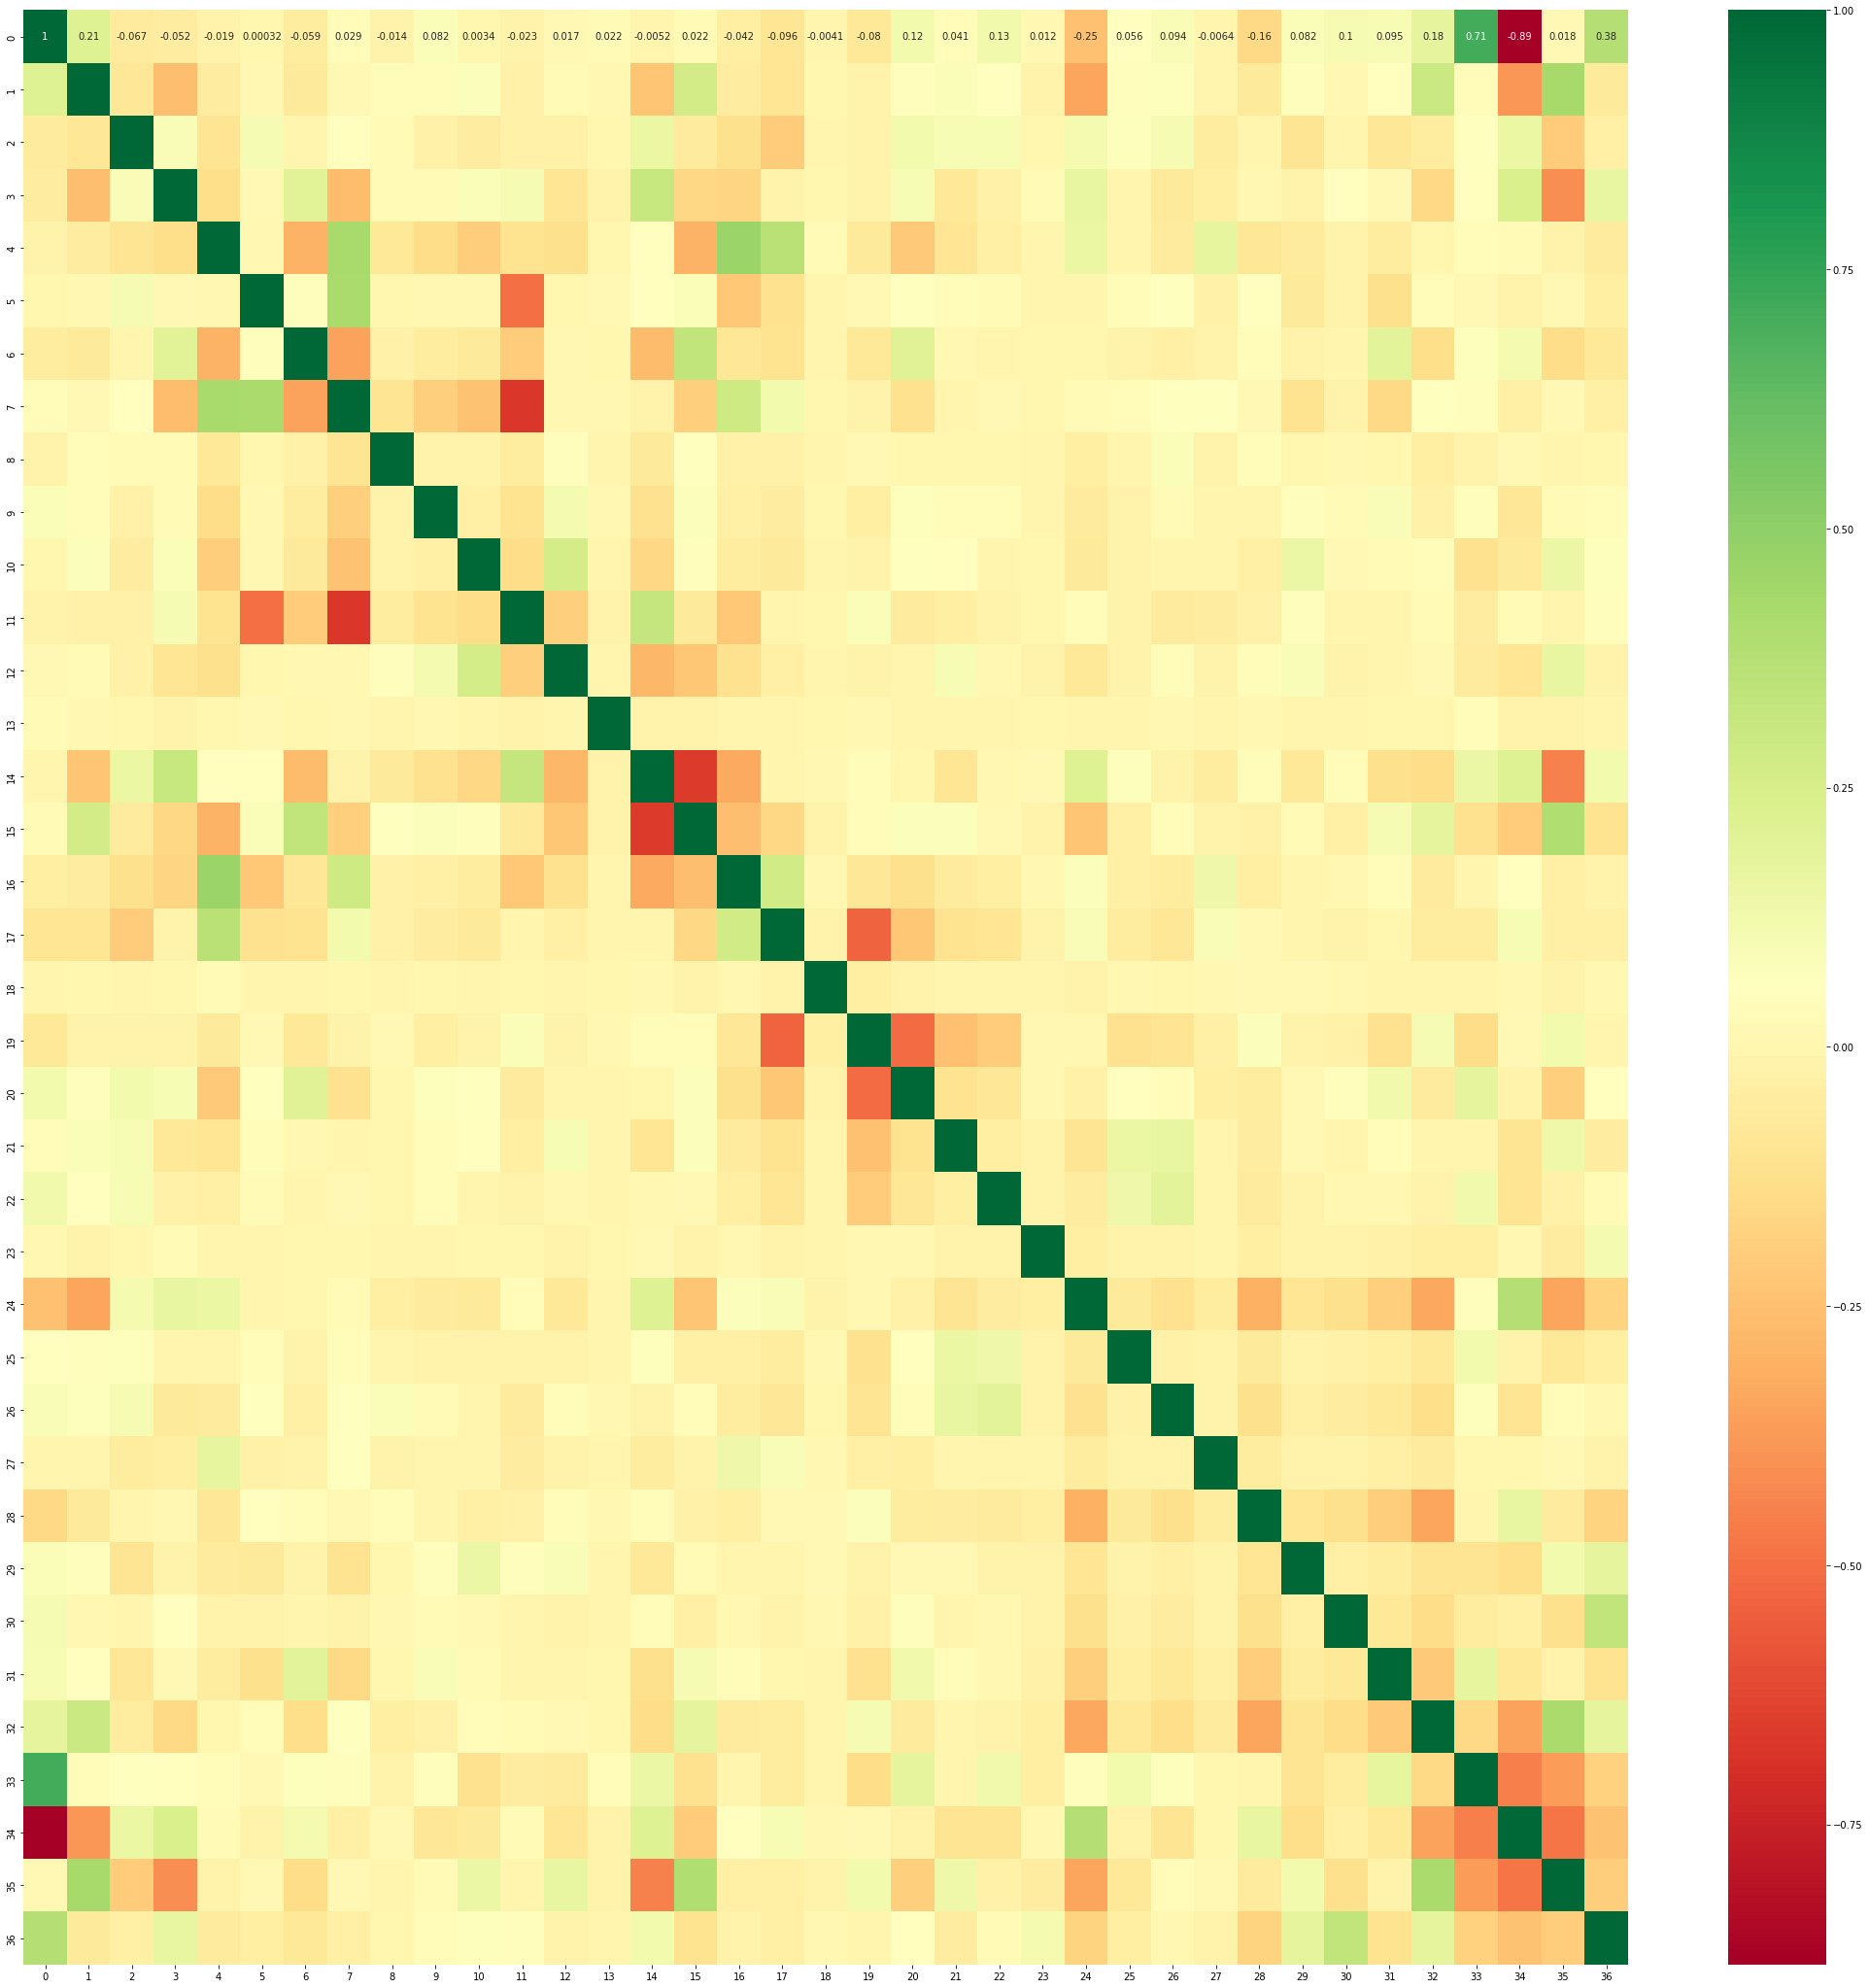

In [11]:
#get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(37,37))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")